##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 5 Report

## Group Members: Akash Shetty and Helen Lai

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import dynworm as dw

## Exercise 1: Visualize brain connectomes

<img src="lab5_exercise1.png" width="1000">

In [5]:
# Load synaptic connectome and neuron classes

celegans_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
celegans_syn_conn_np = np.array(celegans_syn_conn_pd)

# Classes are ordered according to the neurons' order in synaptic connectome
neuron_classes = np.load('neuron_classes.npy') 

In [6]:
# Adjacency matrix of the first 10 neurons
print(celegans_syn_conn_np[:10, :10])


[[0 0 0 3 0 0 7 0 0 0]
 [0 0 1 0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [7]:
# Neuron classes of the first 10 neurons
print(neuron_classes[:10])
print(np.where(neuron_classes[:10] == 'sensory'))

['sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory'
 'sensory' 'sensory' 'sensory']
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


In [8]:
def vis_conn(syn_conn, neuron_classes):
    
    sensory_indexes = np.where(neuron_classes == 'sensory')[0] # gets where there is sensory indexes
    inter_indexes = np.where(neuron_classes == 'inter')[0] # gets where there is inter indexes
    motor_indexes = np.where(neuron_classes == 'motor')[0] # gets where there is motor indexes
    
    
    sensory_array = np.zeros((len(sensory_indexes),len(sensory_indexes))) # zero placement array to create for sensory array
    for i in range(len(sensory_indexes)):
        for j in range(len(sensory_indexes)):
            sensory_array[i][j] = syn_conn[sensory_indexes[i]][sensory_indexes[j]] # double for loop that inputs only sensory values to our sensory array
            
    
    inter_array = np.zeros((len(inter_indexes),len(inter_indexes))) # zero placement array for inter array
    for i in range(len(inter_indexes)):
        for j in range(len(inter_indexes)):
            inter_array[i][j] = syn_conn[inter_indexes[i]][inter_indexes[j]] # double for loop that inputs only inter values
    
    motor_array = np.zeros((len(motor_indexes),len(motor_indexes))) # zero placement array for motor array
    for i in range(len(motor_indexes)):
        for j in range(len(motor_indexes)):
            motor_array[i][j] = syn_conn[motor_indexes[i]][motor_indexes[j]] # double for loop that inputs only motor values
    
    # outputs graphs for sensory, inter and motor arrays
    plt.pcolor(sensory_array, cmap = 'Greys', vmin =0, vmax = 1)
    plt.ylim(len(sensory_array),0)
    plt.show()
    
    
    plt.pcolor(inter_array, cmap = 'Greys', vmin =0, vmax = 1)
    plt.ylim(len(inter_array),0)
    plt.show()
    
    
    plt.pcolor(motor_array, cmap = 'Greys', vmin =0, vmax = 1)
    plt.ylim(len(motor_array),0)
    plt.show()
    
    # YOUR CODE HERE
    # The function should output a 1 x 3 subplot
    # For each subplot, make sure to set plt.ylim(len(sub_adjacency_matrix), 0) so that first row starts with neuron 0
    # Add appropriate x,y labels for each subplot (e.g. sensory vs sensory, inter vs inter, etc)
    

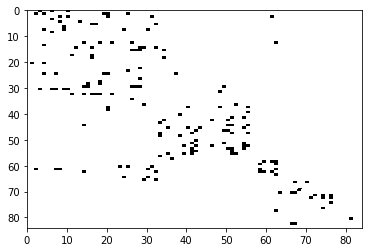

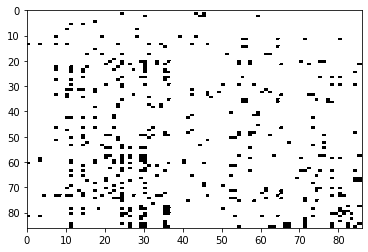

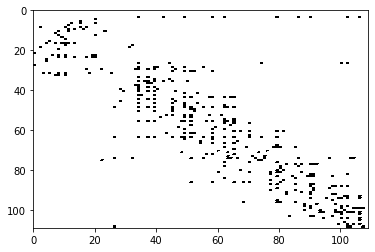

In [9]:
# Test your function here

vis_conn(syn_conn = celegans_syn_conn_np, neuron_classes = neuron_classes)

## Exercise 2: Locating the most connected vertices

<img src="lab5_exercise2.png" width="1000">

In [10]:
# Load the synaptic connectome and sample social network

syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
syn_conn_np = np.array(syn_conn_pd)

social_network_sample_pd = pd.read_excel('social_network_sample.xlsx')
social_network_sample_np = np.array(social_network_sample_pd)

In [11]:
def find_hub_vertices(adj_mat, num_vertices): # function to find hub vertices
    
    # YOUR CODE HERE
    outdegrees = np.sum(adj_mat,axis = 0) # sums values in rows to get outdegrees
    indegrees = np.sum(adj_mat,axis = 1) # sums values in columns to get indegrees
    
    indegree_list = (np.argsort(outdegrees)[::-1])[:num_vertices] # sorts indegrees from highest to lowest and for the corresponding number of vertices
    outdegree_list = (np.argsort(indegrees)[::-1])[:num_vertices] # sorts outdegrees from highest to lowest and for the corresponding number of vertices
    
    return indegree_list, outdegree_list

In [12]:
# Test your function with synaptic connectome

indegree_list_syn_conn, outdegree_list_syn_conn = find_hub_vertices(adj_mat = syn_conn_np, num_vertices = 10)

In [13]:
print(indegree_list_syn_conn)

[105 214 195 231  48  96 181 253  58 163]


In [14]:
print(outdegree_list_syn_conn)

[ 56  48 261  64 253 267  15   7 172 244]


In [15]:
# Test your function with sample social media network

indegree_list_SN, outdegree_list_SN = find_hub_vertices(adj_mat = social_network_sample_np, num_vertices = 5)

In [16]:
print(indegree_list_SN)

[31 62 43 93 53]


In [17]:
print(outdegree_list_SN)

[ 1 99 26 19 49]


## Exercise 3: Removing vertices from a graph

<img src="lab5_exercise3.png" width="1000">

In [18]:
# We will use the pre-existing directed graph sample earlier in the lab

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)
print(directed_adj_mat_np)

[[0 6 0 0 0 0 6]
 [0 0 6 5 0 0 6]
 [5 0 0 0 0 0 0]
 [6 6 0 0 5 0 6]
 [0 0 0 5 0 0 0]
 [0 0 0 5 5 0 0]
 [0 6 0 6 5 0 0]]


In [36]:
def remove_vertices(adj_mat, vertices_2b_removed):
    adj_mat_new = np.copy(adj_mat)
    # YOUR CODE HERE
    # for loop that makes all the elements in the array 0
    for i in vertices_2b_removed:
        adj_mat_new[i] = 0
        adj_mat_new[:,i] = 0
    
    return adj_mat_new



In [37]:
vertices_2b_removed_1 = [0, 5]        # Vertices to be removed set 1
vertices_2b_removed_2 = [1, 2, 6]     # Vertices to be removed set 2

In [38]:
# Test your function with set 1

directed_adj_mat_new_1 = remove_vertices(directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_1)

In [39]:
# Test your function with set 2

directed_adj_mat_new_2 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_2)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

<function matplotlib.pyplot.show(close=None, block=None)>

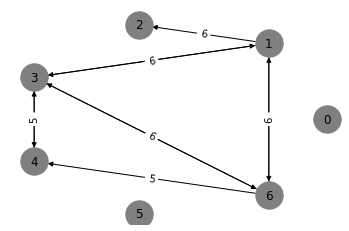

In [40]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_1
# Use circular graph layout
# Label your edges according to their weights
directed_adj_mat_new_nx = nx.from_numpy_array(directed_adj_mat_new_1, create_using = nx.DiGraph())
pos = nx.circular_layout(directed_adj_mat_new_nx)
nx.draw_networkx(directed_adj_mat_new_nx, pos, with_labels = True, node_size = 750, node_color = 'grey')
labels = nx.get_edge_attributes(directed_adj_mat_new_nx,'weight')
nx.draw_networkx_edge_labels(directed_adj_mat_new_nx,pos, edge_labels = labels)

plt.axis('off')
plt.show
# YOUR CODE HERE

<function matplotlib.pyplot.show(close=None, block=None)>

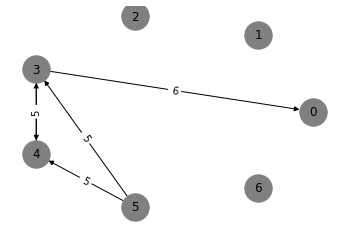

In [41]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_2
# Use circular graph layout
# Label your edges according to their weights
directed_adj_mat_new_nx = nx.from_numpy_array(directed_adj_mat_new_2, create_using = nx.DiGraph())
pos = nx.circular_layout(directed_adj_mat_new_nx)
nx.draw_networkx(directed_adj_mat_new_nx, pos, with_labels = True, node_size = 750, node_color = 'grey')
labels = nx.get_edge_attributes(directed_adj_mat_new_nx,'weight')
nx.draw_networkx_edge_labels(directed_adj_mat_new_nx,pos, edge_labels = labels)

plt.axis('off')
plt.show
# YOUR CODE HERE

## Exercise 4: Adding a new vertex to a graph

<img src="lab5_exercise4.png" width="1000">

In [25]:
# We will use the pre-existing directed graph sample earlier in the lab
# The graph has 7 vertices

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [26]:
def add_vertex(adj_mat, outgoing_edges, incoming_edges):
    adj_mat_new = np.copy(adj_mat)
    # YOUR CODE HERE
    # The original directed graph has 7 vertices
    # The new vertex to be added can be regarded as 8th vertex of the graph
    # You can assume that each edge being added has weight of 1
    
    base = np.zeros(len(adj_mat_new)) # new empty placeholder array
    base_2 = np.zeros((1,len(adj_mat_new)+1)) # expands dimensions of array
    adj_mat_new = np.insert(adj_mat_new, len(adj_mat_new),base, axis = 0 ) # insert 
    adj_mat_new = np.insert(adj_mat_new, len(adj_mat_new)-1,base_2, axis = 1 )
    
    # sets all outgoing edges uqal the weight one
    for i in outgoing_edges:
        adj_mat_new[len(adj_mat_new)-1][i] = 1
        
    # set all incoming edges equal to the weight one
    for i in incoming_edges:
        adj_mat_new[i][len(adj_mat_new)-1] = 1
        
    
    
    return adj_mat_new

In [27]:
# Define outgoing and incoming edges for the new vertex to be added

outgoing_edges = [2, 3, 5]
incoming_edges = [3, 4, 6]

In [28]:
# Test your function with provided list of outgoing/incoming edges

directed_adj_mat_vertex_added = add_vertex(adj_mat = directed_adj_mat_np, 
                                  outgoing_edges = outgoing_edges, 
                                  incoming_edges = incoming_edges)
print(directed_adj_mat_vertex_added)

[[0 6 0 0 0 0 6 0]
 [0 0 6 5 0 0 6 0]
 [5 0 0 0 0 0 0 0]
 [6 6 0 0 5 0 6 1]
 [0 0 0 5 0 0 0 1]
 [0 0 0 5 5 0 0 0]
 [0 6 0 6 5 0 0 1]
 [0 0 1 1 0 1 0 0]]


### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

<function matplotlib.pyplot.show(close=None, block=None)>

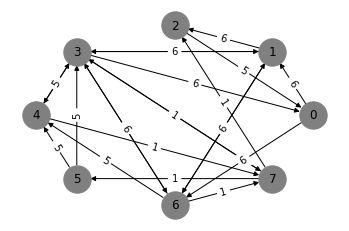

In [29]:
# Using networkX, plot your directed graph with added vertices according to outgoing_edges and incoming_edges
# Use circular graph layout
# Label your edges according to their weights
directed_adj_mat_new_nx = nx.from_numpy_array(directed_adj_mat_vertex_added, create_using = nx.DiGraph())
pos = nx.circular_layout(directed_adj_mat_new_nx)
nx.draw_networkx(directed_adj_mat_new_nx, pos, with_labels = True, node_size = 750, node_color = 'grey')
labels = nx.get_edge_attributes(directed_adj_mat_new_nx,'weight')
nx.draw_networkx_edge_labels(directed_adj_mat_new_nx,pos, edge_labels = labels)

plt.axis('off')
plt.show
# YOUR CODE HERE

## Exercise 5: Re-wire neurons to restore behavior of C. elegans

<img src="lab5_exercise5.png" width="1000">

### Note: If you wish to use the included C. elegans simulation code in lab template folder outside of EE 241 (e.g. research purpose), please cite the following paper 
### Kim, J., Leahy, W., & Shlizerman, E. (2019). Neural interactome: Interactive simulation of a neuronal system. Frontiers in Computational Neuroscience, 13, 8. 

In [30]:
# Load synaptic connectome and neuron classes

damaged_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
damaged_syn_conn_np = np.array(damaged_syn_conn_pd)

## Motorneurons' activities during gentle tail touch (Damaged brain)

<img src="damaged_AVA_motor_activities.png" width="450">

## Simulated body movement during gentle tail touch (Damaged brain)

In [31]:
from ipywidgets import Video

Video.from_file("escape_response_damaged.mp4", width=500, height=500)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x06\x01umdat\x00\x…

In [32]:
# Re-wiring instructions for AVAL and AVAR neurons

outgoing_AVAL_triples = np.load('AVAL_outgoing_triples.npy') # AVAL is the 47th vertex in the graph
incoming_AVAL_triples = np.load('AVAL_incoming_triples.npy') # AVAL is the 47th vertex in the graph
print(len(incoming_AVAL_triples))
outgoing_AVAR_triples = np.load('AVAR_outgoing_triples.npy') # AVAR is the 55th vertex in the graph
incoming_AVAR_triples = np.load('AVAR_incoming_triples.npy') # AVAR is the 55th vertex in the graph


# Each row in the triple is ordered as [Source neuron index, Target neuron index, Synaptic weight]

rewiring_triples_AVAL = [outgoing_AVAL_triples, incoming_AVAL_triples]

rewiring_triples_AVAR = [outgoing_AVAR_triples, incoming_AVAR_triples]

53


In [42]:
def rewire_neurons(damaged_synaptic_adj_matrix, rewiring_instructions_AVAL, rewiring_instructions_AVAR):
    
    # creates a copy of of the damaged synapitic adj matrix
    repaired_synaptic_adj_matrix = np.copy(damaged_synaptic_adj_matrix)
    
    # inputs outgoing_AVAL from matrix 0 and input from matrix 1
    outgoing_AVAL = rewiring_instructions_AVAL[0]
    input_AVAL = rewiring_instructions_AVAL[1]
    
    # inputs outgoing _AVAr from matrix 0 and input from matrix 1
    outgoing_AVAR = rewiring_instructions_AVAR[0]
    input_AVAR = rewiring_instructions_AVAR[1]
    
    
    # for loops to set each value of the of the reformed to the fixed value instructions
    for i in range(len(outgoing_AVAL)):
        repaired_synaptic_adj_matrix[outgoing_AVAL[i][0]][outgoing_AVAL[i][1]] = outgoing_AVAL[i][2]
        
    for i in range(len(input_AVAL)):
        repaired_synaptic_adj_matrix[input_AVAL[i][0]][input_AVAL[i][1]] = input_AVAL[i][2]
    
    for i in range(len(outgoing_AVAR)):
        repaired_synaptic_adj_matrix[outgoing_AVAR[i][0]][outgoing_AVAR[i][1]] = outgoing_AVAR[i][2]
        
    for i in range(len(input_AVAR)):
        repaired_synaptic_adj_matrix[input_AVAR[i][0]][input_AVAR[i][1]] = input_AVAR[i][2]
    
    
    
    # YOUR CODE HERE
    # AVAL, AVAR neurons take the indices of 47, 55 respectively in the damaged_syn_conn_np   
    return repaired_synaptic_adj_matrix

In [43]:
repaired_synaptic_adj_matrix = rewire_neurons(damaged_synaptic_adj_matrix = damaged_syn_conn_np, 
                                              rewiring_instructions_AVAL = rewiring_triples_AVAL, 
                                              rewiring_instructions_AVAR = rewiring_triples_AVAR)

Repair operation successful! - Simulating the nervous system and body for gentle tale touch
All neurons are healthy
Network integration prep completed...
Computing network dynamics...
11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.9% completed
100.0% completed


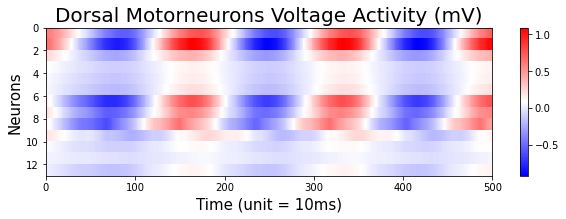

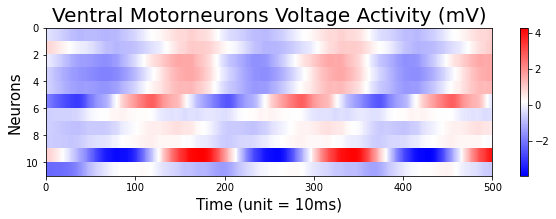

In [44]:
# Test your repaired connectome 

dw.network_sim.test_brain_repair(repaired_synaptic_adj_matrix) 

# If successfully repaired, function will output 
# 1) Motorneurons activity 
# 2) Simulated body movement video with repaired brain